# Internet Consolidation in Africa


We use the AS relationship dataset from CAIDA http://data.caida.org/datasets/as-relationships/serial-1/ to see the relationship between African ISPs and their upstream. To do this, we will take a list of allocated ASes in Africa and run centrality measurements of their providers.

AFRINIC Allocated ASNs:
http://ftp.afrinic.net/pub/stats/afrinic/delegated-afrinic-extended-latest

In [43]:
import numpy as np
import pandas as pd

import networkx as nx
import itertools

import matplotlib.pyplot as plt

ccs = [
'EG', 'BJ', 'CI', 'CV', 'GH', 'GM', 'GN', 'GW', 'AO', 'CF', 'CG', 'CM', 'GA', 'GQ', 'TD', 'BI', 'DJ', 'ER', 'ET', 'KM', 'BW', 'MA', 'SD', 'TN', 'LR', 'ML', 'MR', 'NE', 'NG', 'SL', 'SN', 'TG', 'ST', 'KE', 'MG', 'MU', 'MW', 'MZ', 'RE', 'RW', 'SC', 'SO', 'UG', 'LS', 'NA', 'SZ', 'ZA', 'DZ', 'EH', 'LY', 'BF', 'SH', 'CD', 'TZ', 'YT', 'ZM', 'ZW']

In [107]:
df = pd.read_csv('data/asn_relationship_africa01-08-2019.csv')
df.head()

provider provider_cc provider_name   provider_type  customer customer_cc  \
0         2          US      UDEL-DCN  Transit/Access     37030          GH   
1       174          US    COGENT-174  Transit/Access      2018          ZA   
2       174          US    COGENT-174  Transit/Access      3741          ZA   
3       174          US    COGENT-174  Transit/Access      5713          ZA   
4       174          US    COGENT-174  Transit/Access      6713          MA   

   customer_region customer_name   customer_type  type  
0   Western Africa       TIGO-AS  Transit/Access    -1  
1  Southern Africa       TENET-1  Transit/Access    -1  
2  Southern Africa            IS  Transit/Access    -1  
3  Southern Africa      SAIX-NET  Transit/Access    -1  
4  Northern Africa        IAM-AS         Content    -1

In [113]:
def make_circular_graph(df, min_degree_provider, min_degree_customer ):
    g = nx.from_pandas_edgelist(df, source='provider_name', target='customer_name', edge_attr=None, create_using=None)

    # Make a list of the asn_name, we'll use it later
    provider_asn_names = list(df.provider_name.unique())
    customer_asn_names = list(df.customer_name.unique())

    # figsize is intentionally set small to condense the graph
    fig, ax = plt.subplots(figsize=(40,40))
    margin=0.33
    fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
    ax.axis('equal')

    # 1. Create the graph
    g = nx.from_pandas_edgelist(df, source='provider_name', target='customer_name', edge_attr=None, create_using=None) 
    g.remove_nodes_from(list(nx.isolates(g)))
    # node_list = sorted(g.degree, key=lambda x: x[1], reverse=False)
    node_list = g.nodes()

    n = len(node_list)

    angle = []
    angle_dict = {}
    for i, node in zip(range(n),node_list):
        theta = 2.0*np.pi*i/n
        angle.append((np.cos(theta),np.sin(theta)))
        angle_dict[node] = theta
    pos = {}
    for node_i, node in enumerate(node_list):
        pos[node] = angle[node_i]

    # 2. Create a layout for our nodes 
    layout = nx.circular_layout(g)

    # 3. Draw the parts we want
    nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA', ax=ax)

    providers = [node for node in g.nodes() if node in df.provider_name.unique() and g.degree(node) > min_degree_provider]
    size = [g.degree(node) * 80 for node in g.nodes() if node in df.provider_name.unique()]
    nx.draw_networkx_nodes(g, layout, nodelist=providers, node_size=size, node_color='lightblue',  ax=ax)

    customers = [node for node in g.nodes() if node in df.customer_name.unique() and g.degree(node) > min_degree_customer]
    nx.draw_networkx_nodes(g, layout, nodelist=customers, node_size=100, node_color='#AAAAAA',  ax=ax)

    # high_degree_customers = [node for node in g.nodes() if node in df.customer_name.unique() and g.degree(node) > 1]
    # nx.draw_networkx_nodes(g, layout, nodelist=high_degree_customers, node_size=100, node_color='#fc8d62')

    asn_dict = dict(zip(providers, customers))
    description = nx.draw_networkx_labels(g, pos, labels=asn_dict)

    # 4. Turn off the axis because I know you don't want it
    plt.axis('off')

    #plt.title("Most used providers in Western Africa")

    r = fig.canvas.get_renderer()
    trans = plt.gca().transData.inverted()
    for node, t in description.items():
        bb = t.get_window_extent(renderer=r)
        bbdata = bb.transformed(trans)
        radius = 1.1+bbdata.width/2.
        position = (radius*np.cos(angle_dict[node]),radius* np.sin(angle_dict[node]))
        t.set_position(position)
        t.set_rotation(angle_dict[node]*360.0/(2.0*np.pi))
        t.set_clip_on(False)


    # 5. Tell matplotlib to show it
    plt.show()

## Circular plot for all of Africa


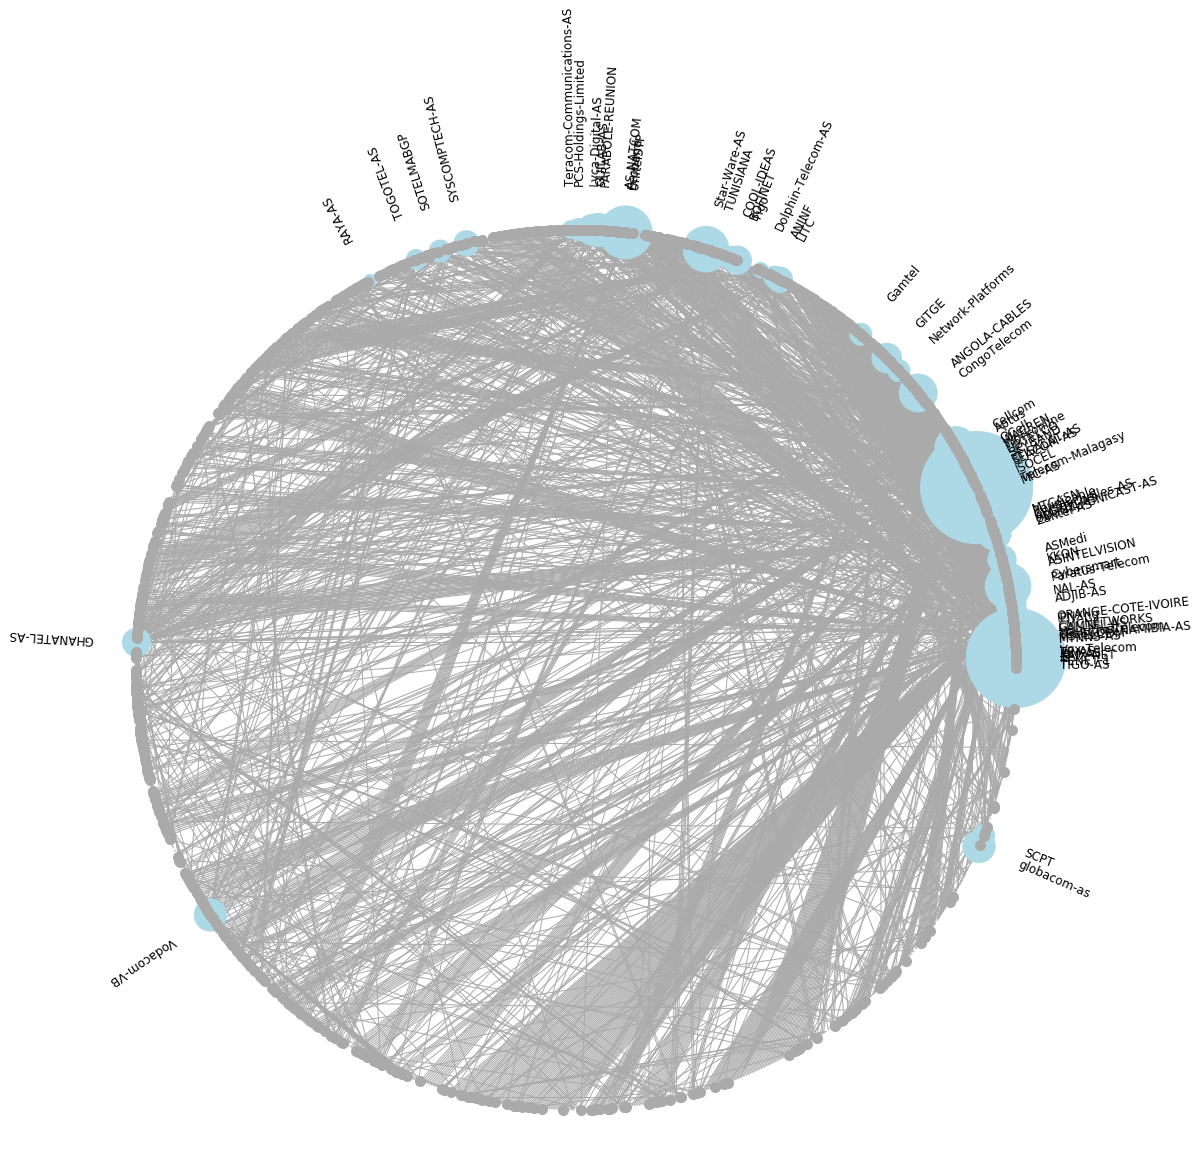

In [122]:
make_circular_graph(df, 10, 1)

## Circular plot for Western Africa


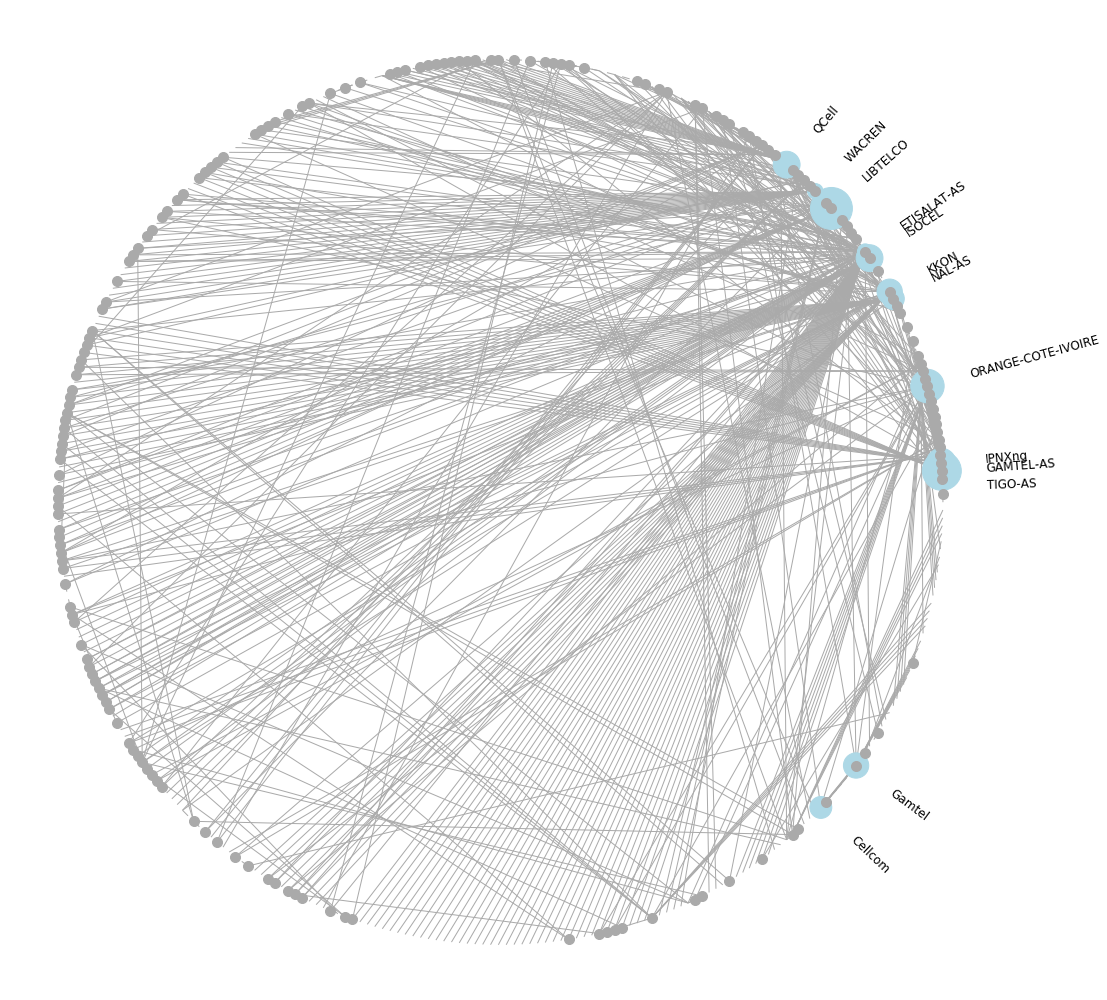

In [115]:
df_west = df[df.customer_region=='Western Africa']
make_circular_graph(df_west, 10, 1)

## Circular plot for Eastern Africa

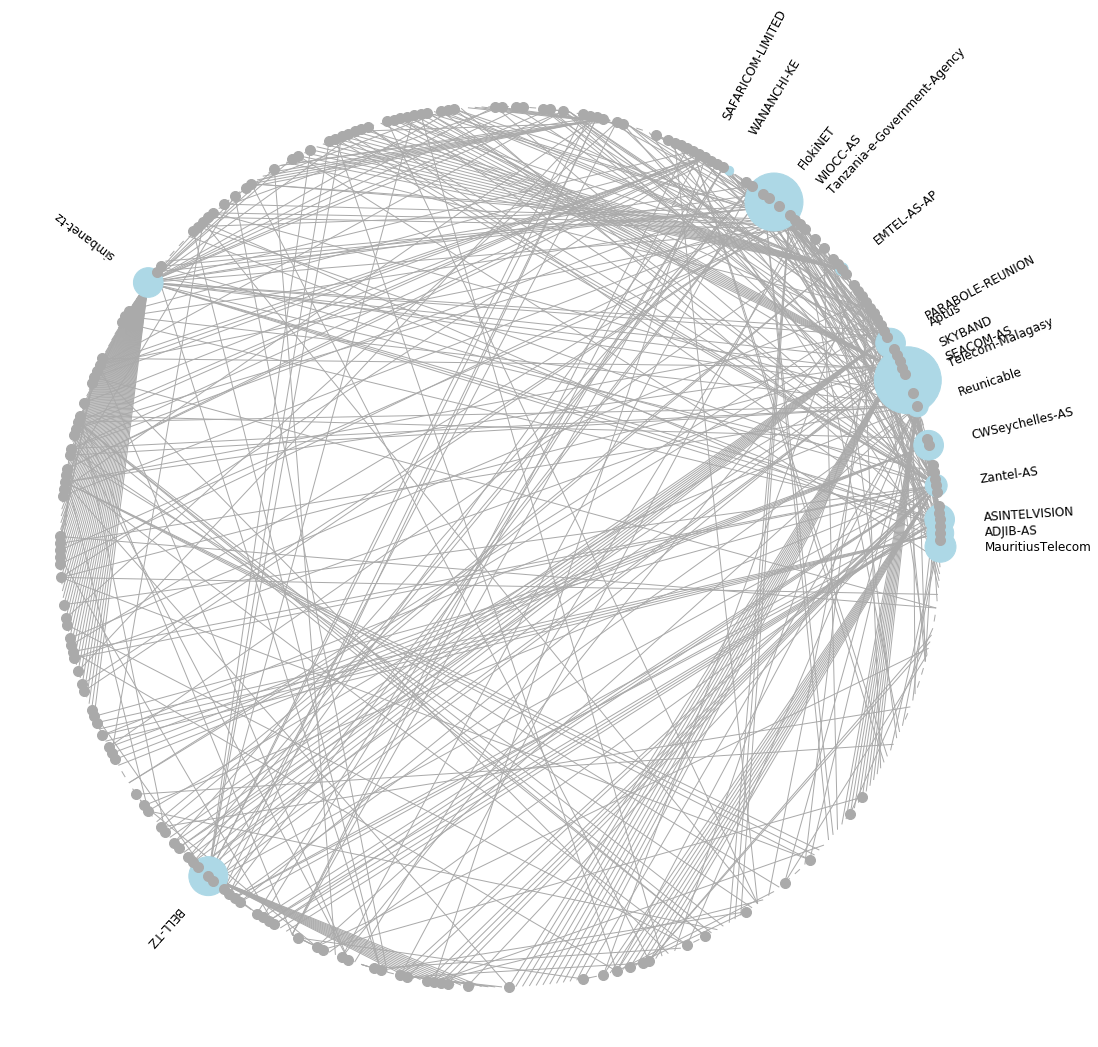

In [116]:
df_east = df[df.customer_region=='Eastern Africa']
make_circular_graph(df_east, 10, 1)

## Circular plot for Southern Africa

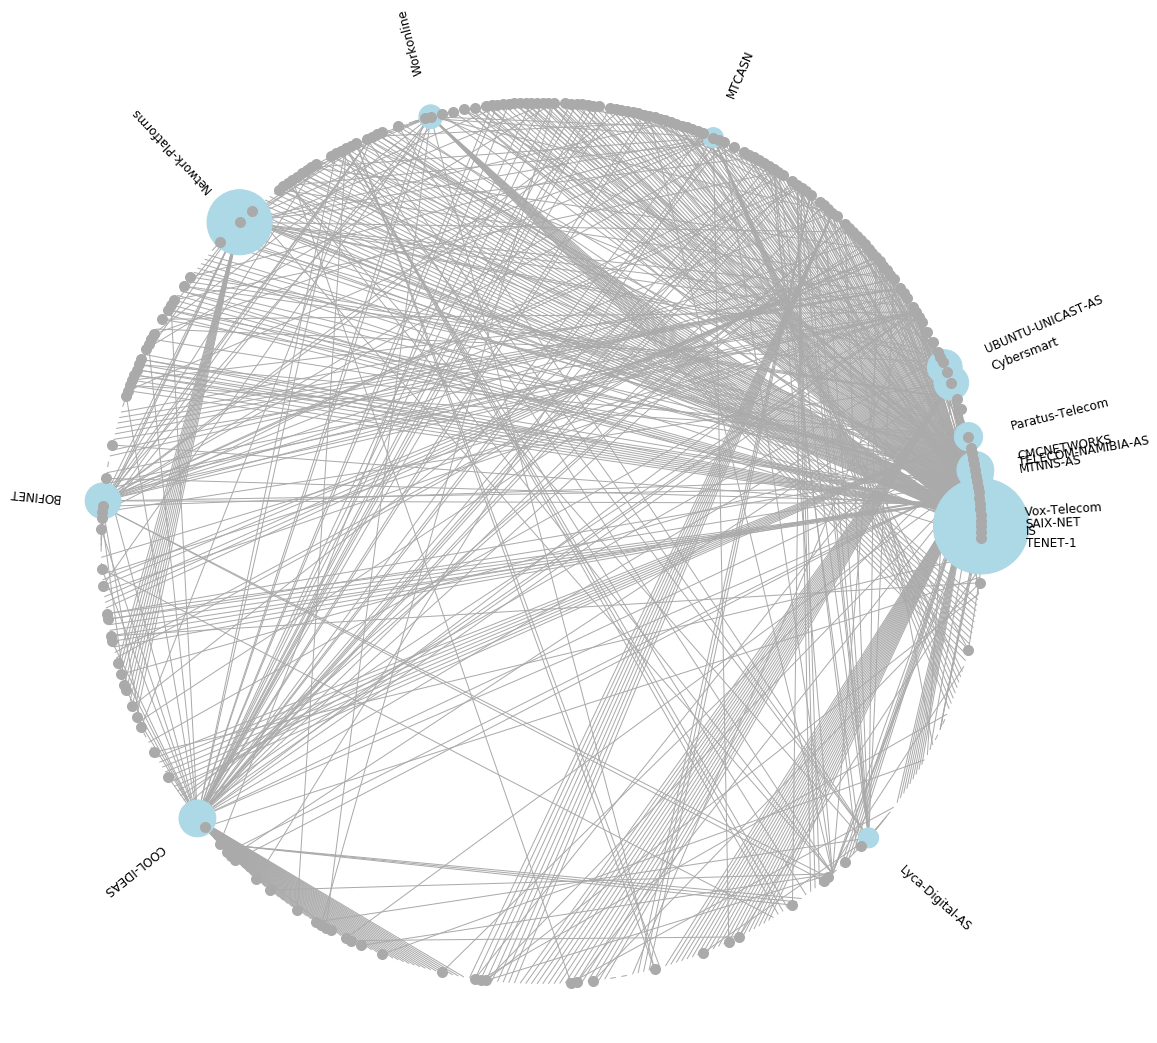

In [121]:
df_south = df[df.customer_region=='Southern Africa']
make_circular_graph(df_south, 15, 1)

## Circular plot for Northern Africa

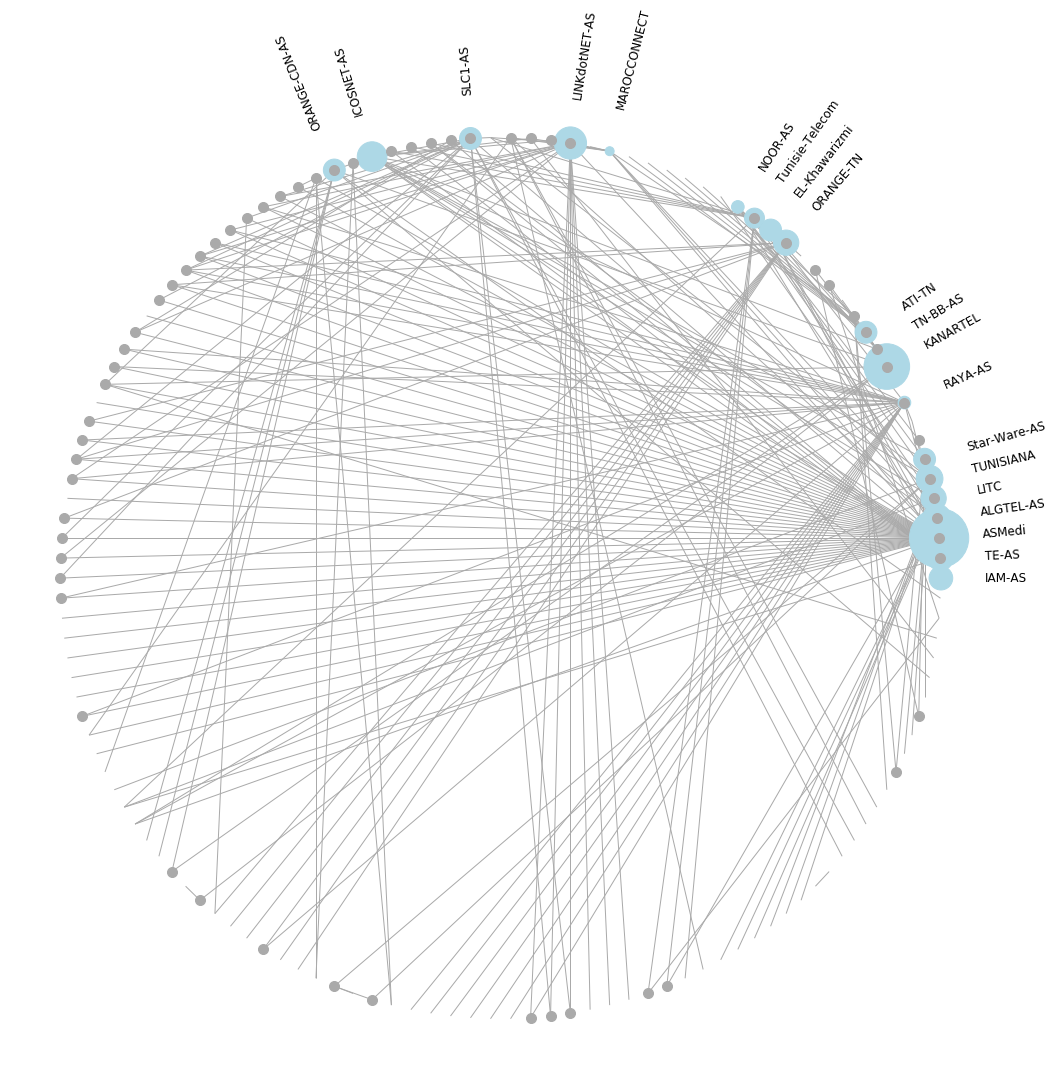

In [123]:
df_north = df[df.customer_region=='Northern Africa']
make_circular_graph(df_north, 5, 1)

## Circular plot for Middle Africa


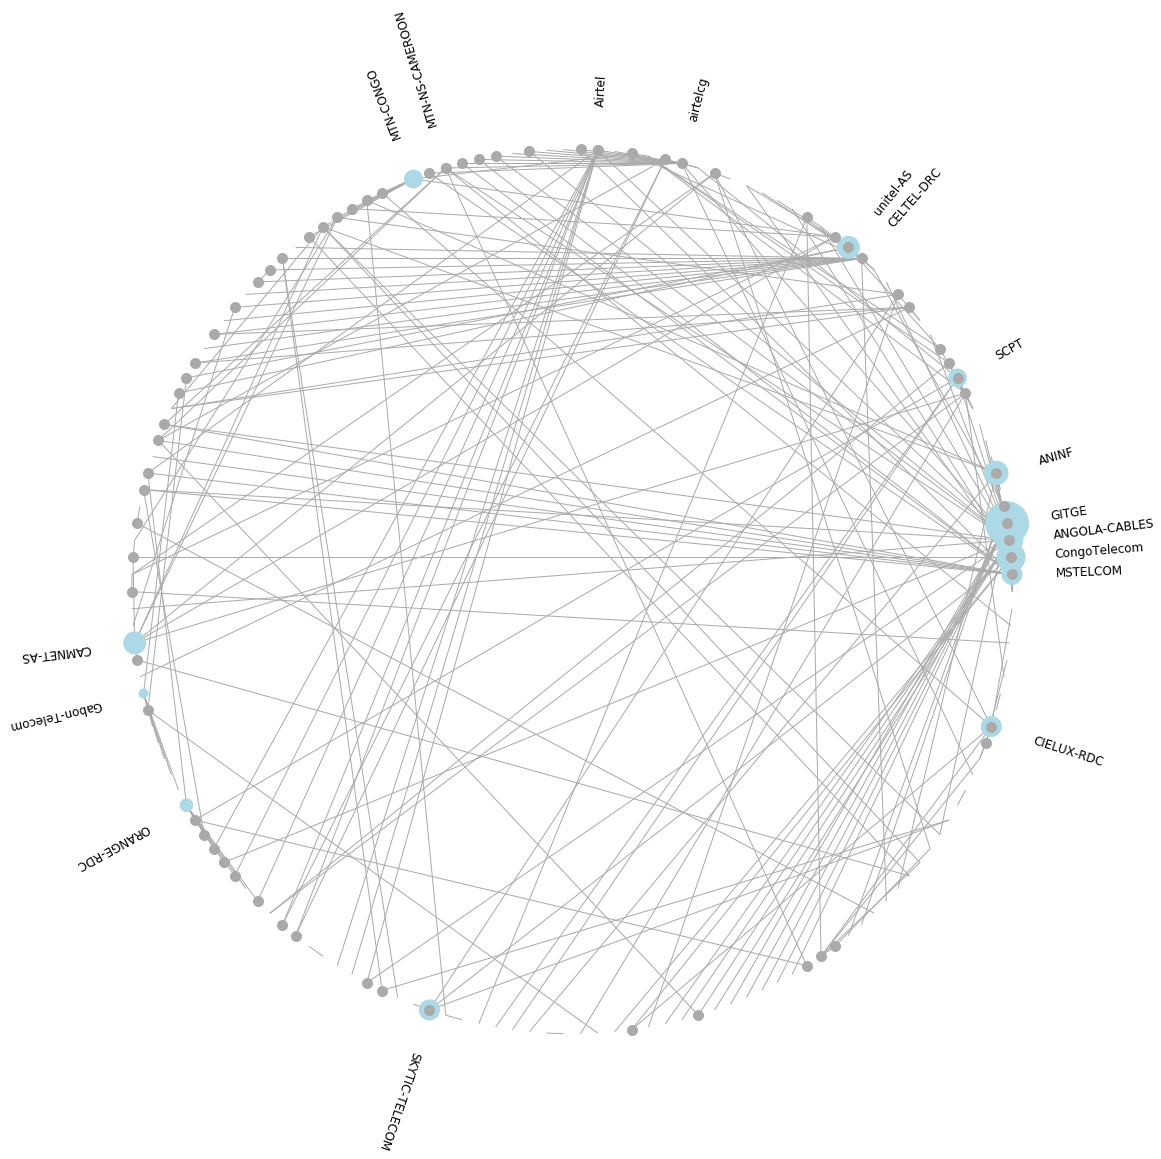

In [118]:
df_middle = df[df.customer_region=='Middle Africa']
make_circular_graph(df_middle, 5, 1)